From the m independent variables of your dataset, PCA extracts p<=m new independent variables that explain the most the variance of the dataset, regardless the dependent variable.

The fact that DV is not considered makes PCA an unsupervised model.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Wine.csv')
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
x = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values
#splitting the dataset
from sklearn.cross_validation import train_test_split
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25, random_state = 0)
#feature scaling the data
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
trainx = scx.fit_transform(trainx)
testx = scx.transform(testx)

#applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
trainx = pca.fit_transform(trainx)
testx = pca.transform(testx)

var = pca.explained_variance_ratio_
pd.DataFrame(var)


,0
0,0.372811
1,0.187400
2,0.108012
3,0.076199
4,0.062619
5,0.048964
6,0.041744
7,0.025159
8,0.023408
9,0.018489


So if are gonna take the first 2 variables, its gonna have a total variance of 0.37+0.187 = 0.56 variance which is quite good! Here is the train x with only 2 variables now.

In [9]:
#applying PCA with 2 now.
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
trainx = pca.fit_transform(trainx)
testx = pca.transform(testx)

var = pca.explained_variance_ratio_
pd.DataFrame(var)

pd.DataFrame(trainx).head()

,0,1
0,2.128500,-1.019732
1,-2.948125,-0.254807
2,1.919795,1.337012
3,-2.133376,-0.945897
4,2.236803,-2.269839


In [5]:
#fitting the model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state = 0)
model = reg.fit(trainx, trainy)



#checking the prediction accuracy.
predy = model.predict(testx)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy, predy)
pd.DataFrame(cm)

,0,1,2
0,16,0,0
1,1,20,0
2,0,0,8


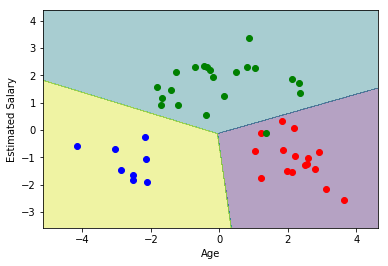

In [6]:
from matplotlib.colors import ListedColormap
X_set, y_set = testx, testy
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.4)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
X_setd = pd.DataFrame(X_set)
x_p = X_setd.loc[(y_set ==1), :].values
x_n = X_setd.loc[(y_set ==2), :].values
x_i = X_setd.loc[(y_set ==3), :].values



plt.scatter(x_p[:, 0], x_p[:, 1], color = 'red')
plt.scatter(x_n[:, 0], x_n[:, 1], color = 'green')
plt.scatter(x_i[:, 0], x_i[:, 1], color = 'blue')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()